# DBN with pyAGrum

This notebook was created based on this tutorial: http://www-desir.lip6.fr/~phw/aGrUM/docs/last/notebooks/32-dynamicBn.ipynb.html

In [2]:
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.dynamicBN as gdyn
%matplotlib inline

## Creating the BN model

In [3]:
twodbn = gum.BayesNet()

## Creating Nodes

Note the naming convention for a 2TBN : a variable with a name A is present at t=0 with the name A0 and at time t as At.(From the tutorial)

### Subjects nodes

In [4]:
# Subjects nodes
subjects_nodes = ['ca0', 'co0', 'h0', 'cat', 'cot', 'ht']

[
    twodbn.add(gum.LabelizedVariable(s, s, 2)) 
    for s in subjects_nodes
]

[0, 1, 2, 3, 4, 5]

### Evidences nodes

In [5]:
evidences_nodes = ['evca0', 'evco0', 'evh0', 'evcat', 'evcot', 'evht']

[
    twodbn.add(gum.LabelizedVariable(s, s, 2)) 
    for s in evidences_nodes
]

[6, 7, 8, 9, 10, 11]

## Creating Arcs

### Subjects Arcs

In [6]:
twodbn.addArc('ca0', 'h0')
twodbn.addArc('co0', 'h0')
twodbn.addArc('cat', 'ht')
twodbn.addArc('cot', 'ht')

### Evidences Arcs

In [7]:
twodbn.addArc('ca0', 'evca0')
twodbn.addArc('co0', 'evco0')
twodbn.addArc('h0', 'evh0')
twodbn.addArc('cat', 'evcat')
twodbn.addArc('cot', 'evcot')
twodbn.addArc('ht', 'evht')

### Transitions Arcs

In [8]:
twodbn.addArc('ca0', 'cat')
twodbn.addArc('co0', 'cot')
twodbn.addArc('h0', 'ht')

## Creating the CPTs for subjects, evidences and transitions

Method orders for probabilities
.fillWith([False, True])

### Subjects CPTs

In [9]:
twodbn.cpt('ca0').fillWith([0.5, 0.5])
twodbn.cpt('co0').fillWith([0.5, 0.5])
twodbn.cpt('h0')[{'ca0': 0, 'co0': 0}] = [0.9, 0.1]
twodbn.cpt('h0')[{'ca0': 0, 'co0': 1}] = [0.7, 0.3]
twodbn.cpt('h0')[{'ca0': 1, 'co0': 0}] = [0.7, 0.3]
twodbn.cpt('h0')[{'ca0': 1, 'co0': 1}] = [0.2, 0.8]

In [10]:
twodbn.cpt('ca0')

(gum::Potential<double>@0x28fb0d0) <ca0:0> :: 0.5 /<ca0:1> :: 0.5

In [11]:
twodbn.cpt('co0')

(gum::Potential<double>@0x2824de0) <co0:0> :: 0.5 /<co0:1> :: 0.5

In [12]:
twodbn.cpt('h0')

(gum::Potential<double>@0x27bf200) <h0:0|ca0:0|co0:0> :: 0.9 /<h0:1|ca0:0|co0:0> :: 0.1 /<h0:0|ca0:1|co0:0> :: 0.7 /<h0:1|ca0:1|co0:0> :: 0.3 /<h0:0|ca0:0|co0:1> :: 0.7 /<h0:1|ca0:0|co0:1> :: 0.3 /<h0:0|ca0:1|co0:1> :: 0.2 /<h0:1|ca0:1|co0:1> :: 0.8

### Evidences CPTs

In [13]:
twodbn.cpt('evca0')[{'ca0': 0}] = [0.8, 0.2]
twodbn.cpt('evca0')[{'ca0': 1}] = [0.1, 0.9]

twodbn.cpt('evco0')[{'co0': 0}] = [0.8, 0.2]
twodbn.cpt('evco0')[{'co0': 1}] = [0.1, 0.9]

twodbn.cpt('evh0')[{'h0': 0}] = [0.8, 0.2]
twodbn.cpt('evh0')[{'h0': 1}] = [0.1, 0.9]

twodbn.cpt('evcat')[{'cat': 0}] = [0.8, 0.2]
twodbn.cpt('evcat')[{'cat': 1}] = [0.1, 0.9]

twodbn.cpt('evcot')[{'cot': 0}] = [0.8, 0.2]
twodbn.cpt('evcot')[{'cot': 1}] = [0.1, 0.9]

twodbn.cpt('evht')[{'ht': 0}] = [0.8, 0.2]
twodbn.cpt('evht')[{'ht': 1}] = [0.1, 0.9]

In [14]:
twodbn.cpt('evca0')

(gum::Potential<double>@0x1ff60e0) <evca0:0|ca0:0> :: 0.8 /<evca0:1|ca0:0> :: 0.2 /<evca0:0|ca0:1> :: 0.1 /<evca0:1|ca0:1> :: 0.9

In [15]:
twodbn.cpt('evco0')

(gum::Potential<double>@0x206f800) <evco0:0|co0:0> :: 0.8 /<evco0:1|co0:0> :: 0.2 /<evco0:0|co0:1> :: 0.1 /<evco0:1|co0:1> :: 0.9

In [16]:
twodbn.cpt('evh0')

(gum::Potential<double>@0x1caef90) <evh0:0|h0:0> :: 0.8 /<evh0:1|h0:0> :: 0.2 /<evh0:0|h0:1> :: 0.1 /<evh0:1|h0:1> :: 0.9

In [17]:
twodbn.cpt('evcat')

(gum::Potential<double>@0x21a2780) <evcat:0|cat:0> :: 0.8 /<evcat:1|cat:0> :: 0.2 /<evcat:0|cat:1> :: 0.1 /<evcat:1|cat:1> :: 0.9

In [18]:
twodbn.cpt('evcot')

(gum::Potential<double>@0x206dd40) <evcot:0|cot:0> :: 0.8 /<evcot:1|cot:0> :: 0.2 /<evcot:0|cot:1> :: 0.1 /<evcot:1|cot:1> :: 0.9

In [19]:
twodbn.cpt('evht')

(gum::Potential<double>@0x2238b70) <evht:0|ht:0> :: 0.8 /<evht:1|ht:0> :: 0.2 /<evht:0|ht:1> :: 0.1 /<evht:1|ht:1> :: 0.9

### Transitions CPTs

In [20]:
# Transitions CTPs
twodbn.cpt('cat')[{'ca0': 0}] = [0.999, 0.001]
twodbn.cpt('cat')[{'ca0': 1}] = [0.001, 0.999]

twodbn.cpt('cot')[{'co0': 0}] = [0.999, 0.001]
twodbn.cpt('cot')[{'co0': 1}] = [0.001, 0.999]

twodbn.cpt('ht')[{'cat': 0, 'cot': 0, 'h0': 0}] = [0.999, 0.001]
twodbn.cpt('ht')[{'cat': 0, 'cot': 0, 'h0': 1}] = [0.9, 0.1]
twodbn.cpt('ht')[{'cat': 0, 'cot': 1, 'h0': 0}] = [0.8, 0.2]
twodbn.cpt('ht')[{'cat': 0, 'cot': 1, 'h0': 1}] = [0.1, 0.9]
twodbn.cpt('ht')[{'cat': 1, 'cot': 0, 'h0': 0}] = [0.8, 0.2]
twodbn.cpt('ht')[{'cat': 1, 'cot': 0, 'h0': 1}] = [0.1, 0.9]
twodbn.cpt('ht')[{'cat': 1, 'cot': 1, 'h0': 0}] = [0.1, 0.9]
twodbn.cpt('ht')[{'cat': 1, 'cot': 1, 'h0': 1}] = [0.001, 0.999]

In [21]:
twodbn.cpt('cat')

(gum::Potential<double>@0x2952e80) <cat:0|ca0:0> :: 0.999 /<cat:1|ca0:0> :: 0.001 /<cat:0|ca0:1> :: 0.001 /<cat:1|ca0:1> :: 0.999

### Save DBN as a file

In [22]:
twodbn.cpt('cot')

(gum::Potential<double>@0x2985960) <cot:0|co0:0> :: 0.999 /<cot:1|co0:0> :: 0.001 /<cot:0|co0:1> :: 0.001 /<cot:1|co0:1> :: 0.999

In [23]:
twodbn.cpt('ht')

(gum::Potential<double>@0x289b9f0) <ht:0|cat:0|cot:0|h0:0> :: 0.999 /<ht:1|cat:0|cot:0|h0:0> :: 0.001 /<ht:0|cat:1|cot:0|h0:0> :: 0.8 /<ht:1|cat:1|cot:0|h0:0> :: 0.2 /<ht:0|cat:0|cot:1|h0:0> :: 0.8 /<ht:1|cat:0|cot:1|h0:0> :: 0.2 /<ht:0|cat:1|cot:1|h0:0> :: 0.1 /<ht:1|cat:1|cot:1|h0:0> :: 0.9 /<ht:0|cat:0|cot:0|h0:1> :: 0.9 /<ht:1|cat:0|cot:0|h0:1> :: 0.1 /<ht:0|cat:1|cot:0|h0:1> :: 0.1 /<ht:1|cat:1|cot:0|h0:1> :: 0.9 /<ht:0|cat:0|cot:1|h0:1> :: 0.1 /<ht:1|cat:0|cot:1|h0:1> :: 0.9 /<ht:0|cat:1|cot:1|h0:1> :: 0.001 /<ht:1|cat:1|cot:1|h0:1> :: 0.999

In [24]:
gum.saveBN(twodbn,os.path.join("out","DBN.bif"))

## Visualizing the DBN

### DBN with 0 and 1 time slices

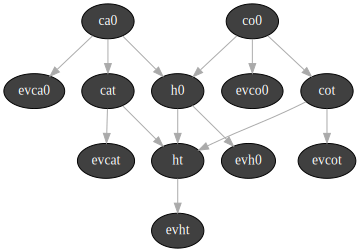

In [25]:
import pyAgrum.lib.notebook as gnb

gnb.forDarkTheme()

gnb.showBN(twodbn)

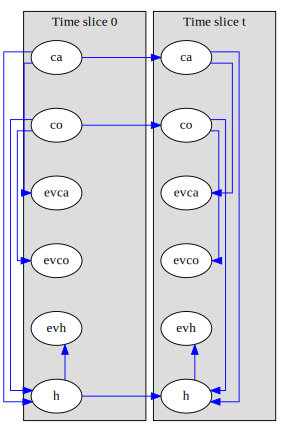

In [26]:
gdyn.showTimeSlices(twodbn)

### DBN expanded with 5 time slices

In [27]:
twodbn.cpt('co0')

(gum::Potential<double>@0x2824de0) <co0:0> :: 0.5 /<co0:1> :: 0.5

In [28]:
gdyn.showTimeSlices??

Signature: gdyn.showTimeSlices(dbn, size=None)
Source:   
def showTimeSlices(dbn, size=None):
  """
  Try to correctly display dBN and 2TBN

  :param dbn: the dynamic BN
  :param size: size of the figue
  :param format: png/svg
  """
  if size is None:
    size = gum.config["dynamicBN", "default_graph_size"]

  showGraph(_TimeSlicesToDot(dbn), size)
File:      ~/Projects/dbn-notebooks/venv/lib/python3.6/site-packages/pyAgrum/lib/dynamicBN.py
Type:      function


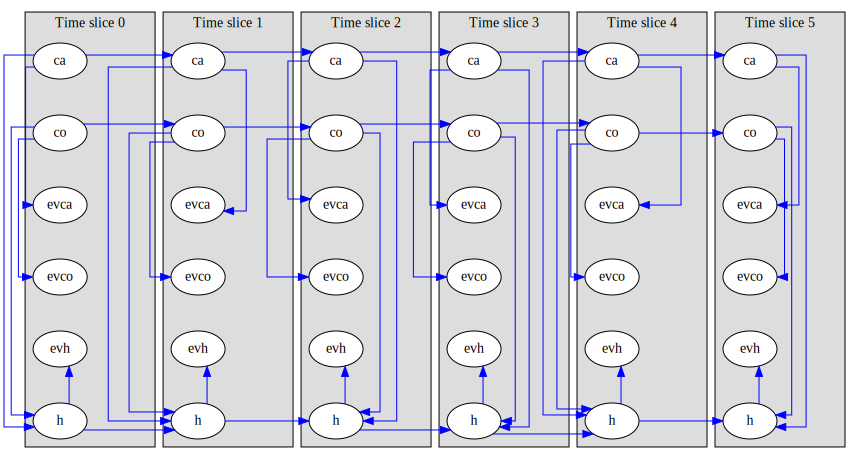

In [29]:
T=6

dbn = gdyn.unroll2TBN(twodbn,T)
gdyn.showTimeSlices(dbn, size="20")

## DBN Inference

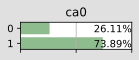

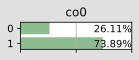

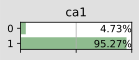

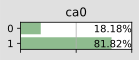

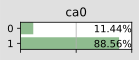

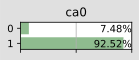

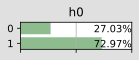

None


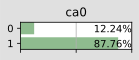

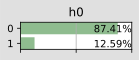

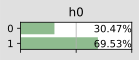

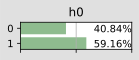

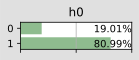

In [30]:
T = 5

#for i in range(T):
#    gnb.showPosterior(dbn,target="ca{}".format(i),evs={})
    
gnb.showPosterior(dbn, target="ca0", evs={'evca0': 1, 'evh0': 0})
gnb.showPosterior(dbn, target="co0", evs={'evco0': 1, 'evh0': 0})
gnb.showPosterior(dbn, target="ca1", evs={'evca0': 1, 'evca1': 1})
gnb.showPosterior(dbn, target="ca0", evs={'evca0': 1, 'evco0': 0})
gnb.showPosterior(dbn, target="ca0", evs={'evca0': 1, 'evh0': 1})
gnb.showPosterior(dbn, target="ca0", evs={'evca0': 1, 'h0': 1})
a = gnb.showPosterior(dbn, target="h0", evs={'evh0': 1})
print(a)
gnb.showPosterior(dbn, target="ca0", evs={'evca0': 1, 'h0': [0.2193, 0.7807]})

gnb.showPosterior(dbn, target="h0", evs={'evh0': 0, 'ca0': [0.1636, 0.8364], 'evca0': 1})
gnb.showPosterior(dbn, target="h0", evs={'evh0': 1, 'ca0': [0.8757, 0.1243], 'evca0': 1})
gnb.showPosterior(dbn, target="h0", evs={'evh0': 1, 'ca0': [0.8757, 0.1243]})
gnb.showPosterior(dbn, target="h0", evs={'evh0': 1, 'evca0': 1})


### Following variables

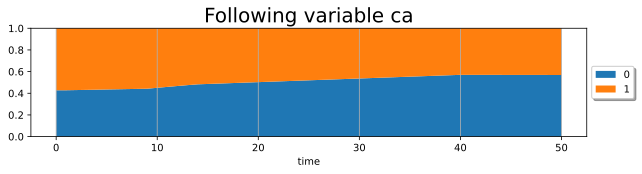

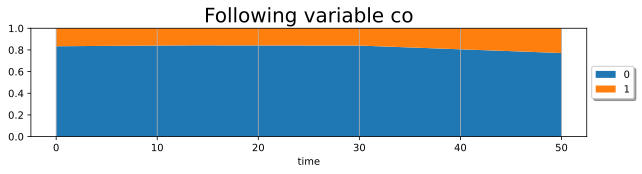

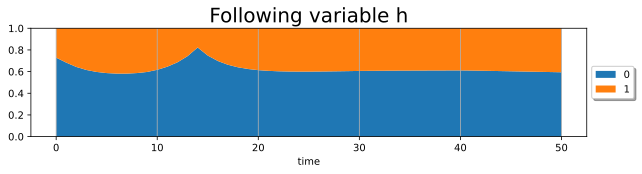

In [31]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 2)
gdyn.plotFollow(
    ["ca","co","h"],
    twodbn,
    T=51,
    evs={
        'evca1': 1,
        'evca9': 1,
        'evco30': 0,
        'evh14': 0,
        'evca40': 0,
        'evco50': 1
    }
)

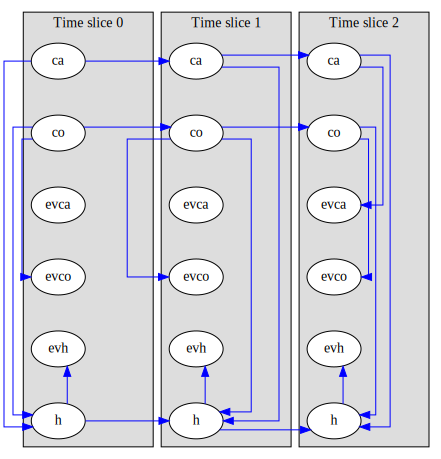

In [34]:
T = 6

dbn = gdyn.unroll2TBN(twodbn, 3)
dbn.eraseArc(f"ca{0}",f"evca{0}")
dbn.eraseArc(f"ca{1}",f"evca{1}")
gdyn.showTimeSlices(dbn, size="20")

## nsDBN (Non-Stationnary Dynamic Bayesian Network)

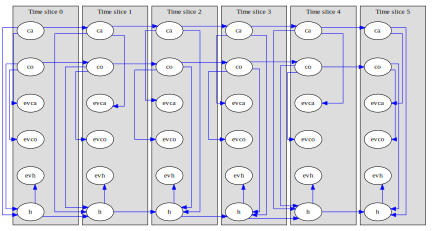

In [132]:
T = 6

dbn = gdyn.unroll2TBN(twodbn, T)
gdyn.showTimeSlices(dbn)

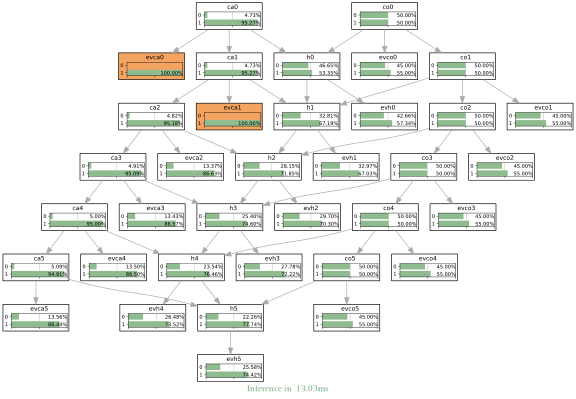

In [133]:
gnb.showInference(dbn,evs={'evca0': 1, 'evca1': 1})

Non-stationnaty DBN allows to express that the dBN do not follow the same 2TBN during all steps. A unrolled dbn is a classical BayesNet and then can be changed as you want after unrolling. (Extracted from tutorial)

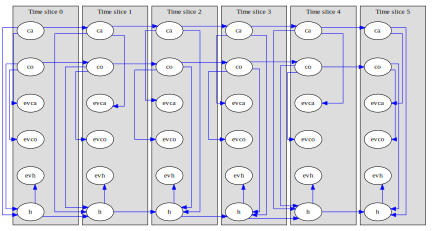

In [134]:
# for i in range(3):
#     dbn.eraseArc(f"h{i}",f"evh{i}")

gum.saveBN(twodbn,os.path.join("out","DBN.bif"))
    
gdyn.showTimeSlices(dbn)

In [135]:
# gnb.showPosterior(dbn, target="h0", evs={'evh0': 1, 'evhd0': 1})
# gnb.showPosterior(dbn, target="h0", evs={'evh0': 1, 'evhd0': 0})

# gnb.showPosterior(dbn, target="h4", evs={'evh0': 1, 'evh1': 1, 'evh2': 1, 'evh3': 1, 'evh4': 1, 'evhd4': 0})
# gnb.showPosterior(dbn, target="h3", evs={'evh0': 1, 'evhd4': 0})

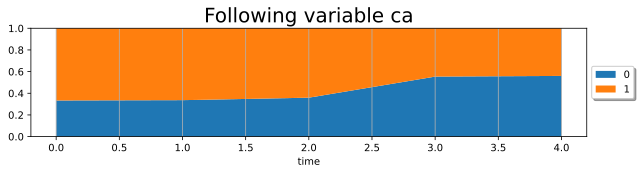

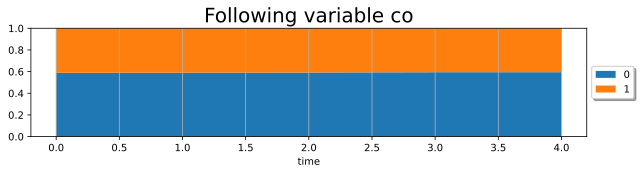

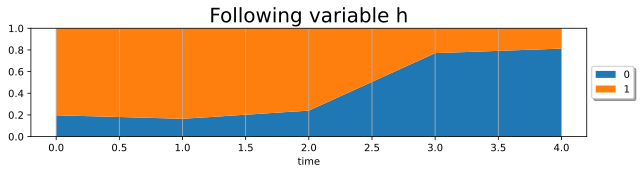

In [136]:
plt.rcParams['figure.figsize'] = (10, 2)
gdyn.plotFollowUnrolled(["ca","co","h"],dbn,T=5, evs={'evca0': 1, 'evh0': 1, 'evca1': 1, 'evh1': 1, 'evca2': 1, 'evh2': 1, 'evca3': 0, 'evh3': 0, 'evca4': 0, 'evh4': 0})

In [137]:
ie = gum.LazyPropagation(dbn)

In [138]:
ie

<pyAgrum.pyAgrum.LazyPropagation; proxy of <Swig Object of type 'gum::LazyPropagation< double > *' at 0x7f11d9fa2270> >

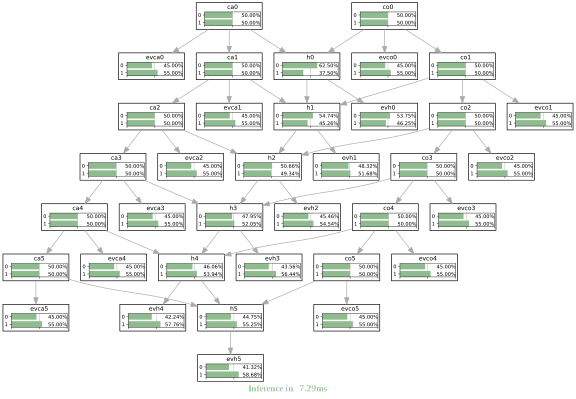

In [139]:
gnb.showInference(dbn,evs={})

In [140]:
ie = gum.VariableElimination(dbn)
ie.setEvidence({'evca0': 1, 'evh0': 1})
ie.makeInference()
ie.posterior('ca0')

(gum::Potential<double>@0x2aaecd0) <ca0:0> :: 0.114382 /<ca0:1> :: 0.885618

In [200]:
ie = gum.VariableElimination(dbn)
ie.setEvidence({'evca0': 1, 'evca1': 1})
ie.makeInference()
ie.posterior('ca1')

(gum::Potential<double>@0x2d32ae0) <ca1:0> :: 0.0472508 /<ca1:1> :: 0.952749

In [142]:
ie = gum.VariableElimination(dbn)
ie.setEvidence({'evca0': 1, 'evh0': 1, 'evca1': 1, 'evh1': 1, 'evca2': 1, 'evh2': 1})
ie.makeInference()
ie.posterior('ca2')

(gum::Potential<double>@0x3078710) <ca2:0> :: 0.00318026 /<ca2:1> :: 0.99682

In [143]:
ie = gum.VariableElimination(dbn)
ie.setEvidence({'evca0': 1, 'evh0': 1, 'evca1': 1, 'evh1': 1, 'evca2': 1, 'evh2': 1, 'evca3': 0, 'evh3': 0})
ie.makeInference()
ie.posterior('ca3')

(gum::Potential<double>@0x200bbd0) <ca3:0> :: 0.0628993 /<ca3:1> :: 0.937101

In [144]:
ie = gum.VariableElimination(dbn)
ie.setEvidence({'evca0': 1, 'evh0': 1, 'evca1': 1, 'evh1': 1, 'evca2': 1, 'evh2': 1, 'evca3': 0, 'evh3': 0, 'evca4': 0, 'evh4': 0})
ie.makeInference()
ie.posterior('ca4')

(gum::Potential<double>@0x2ce0a60) <ca4:0> :: 0.56021 /<ca4:1> :: 0.43979

In [145]:
ie = gum.VariableElimination(dbn)
ie.setEvidence({'evca0': 0, 'evh0': 0, 'evca1': 0, 'evh1': 0, 'evca2': 0, 'evh2': 0, 'evca3': 1, 'evh3': 1, 'evca4': 1, 'evh4': 1})
ie.makeInference()
ie.posterior('ca4')

(gum::Potential<double>@0x3142960) <ca4:0> :: 0.892507 /<ca4:1> :: 0.107493

In [146]:
ie = gum.VariableElimination(dbn)
ie.setEvidence({'evca0': 0, 'evh0': 0, 'evca1': 0, 'evh1': 0, 'evca2': 0, 'evh2': 0, 'evca3': 1, 'evh3': 1, 'evca4': 1, 'evh4': 1, 'evca5': 1, 'evh5': 1})
ie.makeInference()
ie.posterior('ca5')

(gum::Potential<double>@0x31d08b0) <ca5:0> :: 0.577646 /<ca5:1> :: 0.422354

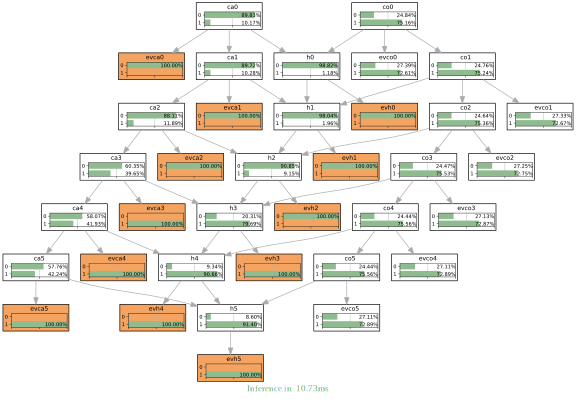

In [147]:
gnb.showInference(dbn,evs={'evca0': 0, 'evh0': 0, 'evca1': 0, 'evh1': 0, 'evca2': 0, 'evh2': 0, 'evca3': 1, 'evh3': 1, 'evca4': 1, 'evh4': 1, 'evca5': 1, 'evh5': 1})

In [148]:
def vals(dbn, ie, nodes=None):
    
    if nodes is None:
        nodes = dbn.nodes()

    exact=[]
    appro=[]

    for node in nodes:
        
        if node.startswith('ev'):
            continue
        # potentials as numpy array
        exact+=ie.posterior(node).tolist()

    return exact

In [149]:
def compareEvidences(dbn, evidences=None, nodes=None):

    results = []

    for evidence in evidences:
        
        print(evidence)

        ie = gum.LazyPropagation(dbn)

        if evidence is not None:
            ie.setEvidence(evidence)

        results.append(vals(dbn,ie, nodes))
        
    print(results)

    plt.plot(*results, label = "Evidencias")

In [150]:
def generate_evidence(index, nodes, observation):
    return {f'ev{node}{index}': observation for node in nodes}

def generate_evidences(nodes, observations):
    
    evidences = {}

    for i in range(T):

        status = observations[i]        
        evidences.update(generate_evidence(i, nodes, status))


    return evidences


def generate_node_evidences(nodes, observations):
    
    evidences = {}

    for i in range(T):

        status = observations[i]        
        evidences.update(generate_evidence(i, nodes, status))


    return evidences

In [218]:
def get_posteriors(dbn, nodes, observations, slices):
    
    evidences = {}
    node_evidences = {node: {} for node in nodes}
    nodes_results = {}

    for i in range(slices):
        
        status = observations[i]
        evidences.update(generate_evidence(i, nodes, status))
        
        for node in nodes:
            
            node_evidences[node].update(generate_evidence(i, [node], status))
        
            ie = gum.VariableElimination(dbn)
            ie.setEvidence(node_evidences[node])
            ie.makeInference()
            a = ie.posterior(f'{node}{i}')

            if node not in nodes_results:
                nodes_results[node] = {False: [round(a[0], 4)], True: [round(a[1], 4)]}
            else:
                nodes_results[node][False].append(round(a[0], 4))
                nodes_results[node][True].append(round(a[1], 4))
                
        print(node_evidences)
        
    return nodes_results        

In [271]:
def plot_evolution(node, values, name, student_index):
    
    print(values)
    
    fig = plt.figure()
    
    # Add a table at the bottom of the axes
    table = plt.table(cellText=[values[True], values[False]],
                      rowLabels=['Verdadeiro', 'Falso'],
#                       rowColours=colors,
                      colLabels=[i for i in range(6)],
                      loc='bottom', bbox=[0, -1.2, 1, 0.7])
    
    table.set_fontsize(10)
    table.scale(1.5, 1.5) 
    
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(values[True], label='Verdadeiro', color='tab:green')
    ax.plot(values[False], label='Falso', color='tab:red')
    ax.set_xlabel('Exercícios')
    ax.set_ylabel('Probabilidade')
    ax.set_title(f'Estudante {student_index} - {node}')
    plt.xlim(0, 4)
    plt.xticks([0, 1, 2, 3, 4, 5])
    ax.legend()
    plt.savefig(f'{name}_{node}', bbox_inches="tight", pad_inches=.2)

{'ca': {'evca0': 0}}
{'ca': {'evca0': 0, 'evca1': 0}}
{'ca': {'evca0': 0, 'evca1': 0, 'evca2': 1}}
{'ca': {'evca0': 0, 'evca1': 0, 'evca2': 1, 'evca3': 1}}
{'ca': {'evca0': 0, 'evca1': 0, 'evca2': 1, 'evca3': 1, 'evca4': 1}}
{'ca': {'evca0': 0, 'evca1': 0, 'evca2': 1, 'evca3': 1, 'evca4': 1, 'evca5': 1}}
{False: [0.8889, 0.9845, 0.9299, 0.7442, 0.3921, 0.1255], True: [0.1111, 0.0155, 0.0701, 0.2558, 0.6079, 0.8745]}


/home/marco/Projects/dbn-notebooks/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


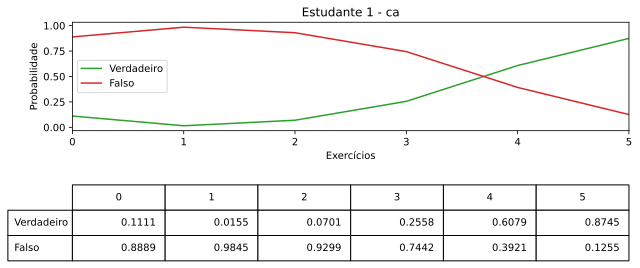

In [272]:
results = get_posteriors(dbn, ['ca'], [0, 0, 1, 1, 1, 1], 6)

for node, values in results.items():
    plot_evolution(node, values, 's1_dbn', 1)

{'ca': {'evca0': 1}}
{'ca': {'evca0': 1, 'evca1': 1}}
{'ca': {'evca0': 1, 'evca1': 1, 'evca2': 1}}
{'ca': {'evca0': 1, 'evca1': 1, 'evca2': 1, 'evca3': 1}}
{'ca': {'evca0': 1, 'evca1': 1, 'evca2': 1, 'evca3': 1, 'evca4': 0}}
{'ca': {'evca0': 1, 'evca1': 1, 'evca2': 1, 'evca3': 1, 'evca4': 0, 'evca5': 1}}
{False: [0.1818, 0.0473, 0.0111, 0.0027, 0.0289, 0.0068], True: [0.8182, 0.9527, 0.9889, 0.9973, 0.9711, 0.9932]}


/home/marco/Projects/dbn-notebooks/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


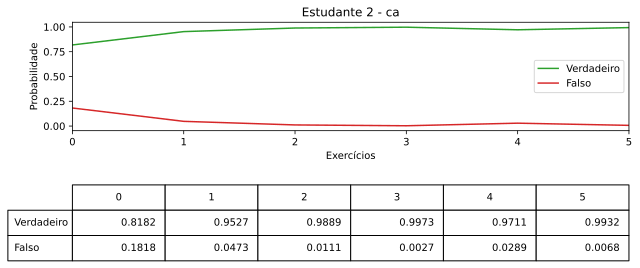

In [273]:
results = get_posteriors(dbn, ['ca'], [1, 1, 1, 1, 0, 1], 6)

for node, values in results.items():
    plot_evolution(node, values, 's2_dbn', 2)

{'ca': {'evca0': 0}}
{'ca': {'evca0': 0, 'evca1': 0}}
{'ca': {'evca0': 0, 'evca1': 0, 'evca2': 1}}
{'ca': {'evca0': 0, 'evca1': 0, 'evca2': 1, 'evca3': 0}}
{'ca': {'evca0': 0, 'evca1': 0, 'evca2': 1, 'evca3': 0, 'evca4': 1}}
{'ca': {'evca0': 0, 'evca1': 0, 'evca2': 1, 'evca3': 0, 'evca4': 1, 'evca5': 0}}
{False: [0.8889, 0.9845, 0.9299, 0.9905, 0.9547, 0.994], True: [0.1111, 0.0155, 0.0701, 0.0095, 0.0453, 0.006]}


/home/marco/Projects/dbn-notebooks/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


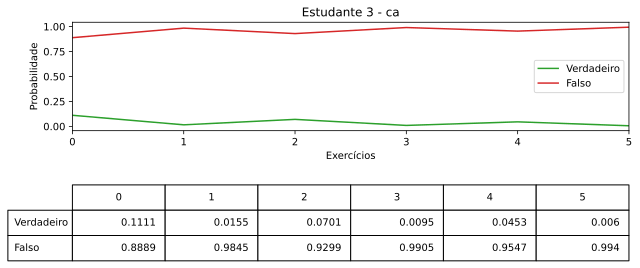

In [274]:
results = get_posteriors(dbn, ['ca'], [0, 0, 1, 0, 1, 0], 6)

for node, values in results.items():
    plot_evolution(node, values, 's3_dbn', 3)

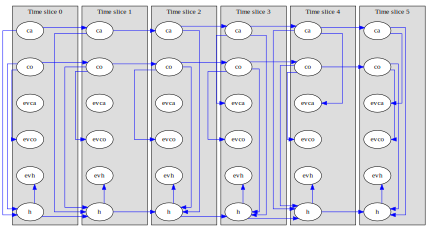

In [275]:
T = 6

dbnvt = gdyn.unroll2TBN(twodbn, T)
for i in range(3):
    dbnvt.eraseArc(f"ca{i}",f"evca{i}")
    
gdyn.showTimeSlices(dbnvt)

{'ca': {'evca0': 0}}
{'ca': {'evca0': 0, 'evca1': 0}}
{'ca': {'evca0': 0, 'evca1': 0, 'evca2': 1}}
{'ca': {'evca0': 0, 'evca1': 0, 'evca2': 1, 'evca3': 1}}
{'ca': {'evca0': 0, 'evca1': 0, 'evca2': 1, 'evca3': 1, 'evca4': 1}}
{'ca': {'evca0': 0, 'evca1': 0, 'evca2': 1, 'evca3': 1, 'evca4': 1, 'evca5': 1}}
{False: [0.5, 0.5, 0.5, 0.1818, 0.0473, 0.0111], True: [0.5, 0.5, 0.5, 0.8182, 0.9527, 0.9889]}


/home/marco/Projects/dbn-notebooks/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


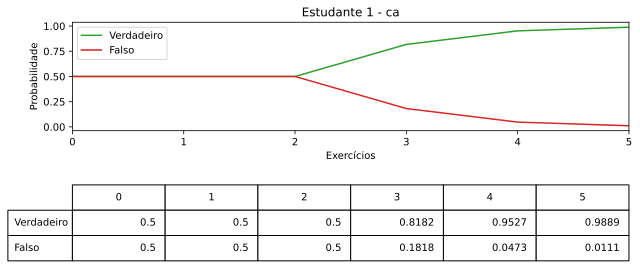

In [276]:
results = get_posteriors(dbnvt, ['ca'], [0, 0, 1, 1, 1, 1], 6)

for node, values in results.items():
    plot_evolution(node, values, 's1_dbnvt', 1)

{'ca': {'evca0': 1}}
{'ca': {'evca0': 1, 'evca1': 1}}
{'ca': {'evca0': 1, 'evca1': 1, 'evca2': 1}}
{'ca': {'evca0': 1, 'evca1': 1, 'evca2': 1, 'evca3': 1}}
{'ca': {'evca0': 1, 'evca1': 1, 'evca2': 1, 'evca3': 1, 'evca4': 0}}
{'ca': {'evca0': 1, 'evca1': 1, 'evca2': 1, 'evca3': 1, 'evca4': 0, 'evca5': 1}}
{False: [0.5, 0.5, 0.5, 0.1818, 0.641, 0.2838], True: [0.5, 0.5, 0.5, 0.8182, 0.359, 0.7162]}


/home/marco/Projects/dbn-notebooks/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


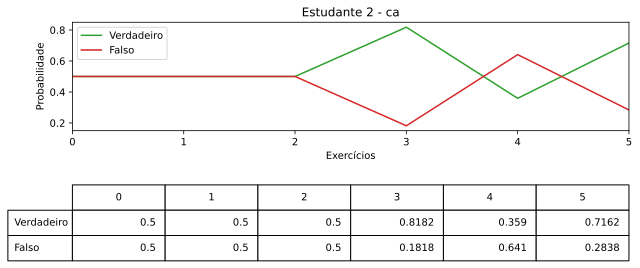

In [277]:
results = get_posteriors(dbnvt, ['ca'], [1, 1, 1, 1, 0, 1], 6)

for node, values in results.items():
    plot_evolution(node, values, 's2_dbnvt', 2)

{'ca': {'evca0': 0}}
{'ca': {'evca0': 0, 'evca1': 0}}
{'ca': {'evca0': 0, 'evca1': 0, 'evca2': 1}}
{'ca': {'evca0': 0, 'evca1': 0, 'evca2': 1, 'evca3': 0}}
{'ca': {'evca0': 0, 'evca1': 0, 'evca2': 1, 'evca3': 0, 'evca4': 1}}
{'ca': {'evca0': 0, 'evca1': 0, 'evca2': 1, 'evca3': 0, 'evca4': 1, 'evca5': 0}}
{False: [0.5, 0.5, 0.5, 0.8889, 0.6382, 0.9337], True: [0.5, 0.5, 0.5, 0.1111, 0.3618, 0.0663]}


/home/marco/Projects/dbn-notebooks/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


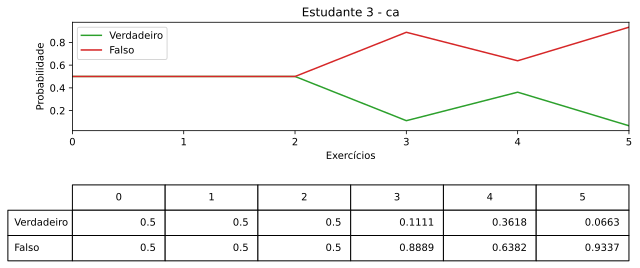

In [278]:
results = get_posteriors(dbnvt, ['ca'], [0, 0, 1, 0, 1, 0], 6)

for node, values in results.items():
    plot_evolution(node, values, 's3_dbnvt', 3)